In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
# from adjustText import adjust_text
import array as arr
import torch

# %pip install eqtransformer
# %pip install adjustText
# %pip install openpyxl

In [3]:
# Use GPU
# torch.cuda.is_available()

False

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [6]:
cat_ds03 = pd.read_excel("~/notebooks/src/workflow/data/ds03.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [7]:
cat_ds03

,CI YEAR,CLUSTER ID,STATION,NETWORK CODE,FILTER USED (Hz)
0,1,OC1,J25A,7D,HP 5
1,1,NaN,M08A,7D,HP 5
2,1,NaN,I02D,TA,HP 5
3,1,OC2,J25A,7D,BP 5-10
4,1,NaN,J33A,7D,BP 5-15
...,...,...,...,...,...
247,4,CI4-45,FC03D,7D,BP 1-15
248,4,NaN,HEBO,UW,BP 2-10
249,4,CI4-47,NLWA,US,HP 3
250,4,CI4-48,OCP,UW,BP 3-10


In [13]:
cat_7D = cat_ds03[cat_ds03['NETWORK CODE']=='7D']

In [14]:
cat_7D['STATION']

0       J25A
1       M08A
3       J25A
4       J33A
8       J41A
       ...  
239     G33D
241     G33D
243     J09D
246     J17D
247    FC03D
Name: STATION, Length: 94, dtype: object

In [19]:
stations= (cat_7D['STATION']).tolist()
stations

['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B  ',
 'G10B  ',
 'G10B  ',
 'FS09B  ',
 'FS13B  ',
 'FS13B  ',
 'FS13B  ',
 'FS16B  ',
 'G10B',
 'FS17B  ',
 'G19B  ',
 'M14B  ',
 'M14B  ',
 'G19B  ',
 'G19B  ',
 'M14B  ',
 'G17B',
 'G17B',
 'G19B  ',
 'G26B  ',
 'G27B  ',
 'G25B  ',
 'G26B  ',
 'M12B  ',
 'M12B  ',
 'G25B  ',
 'M12B  ',
 'M12B  ',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C ',
 'J25C ',
 'M05C ',
 'M06C ',
 'FN02C ',
 'FN02C ',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C ',
 'J34C',
 'M06C ',
 'M05C ',
 'M06C ',
 'J42C',
 'M06C ',
 'J41C',
 'M05C ',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [20]:
for i in range(len(stations)):
    s = stations[i]
    stations[i]= s.replace(" ", "")
        
stations

['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B',
 'G10B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'FS17B',
 'G19B',
 'M14B',
 'M14B',
 'G19B',
 'G19B',
 'M14B',
 'G17B',
 'G17B',
 'G19B',
 'G26B',
 'G27B',
 'G25B',
 'G26B',
 'M12B',
 'M12B',
 'G25B',
 'M12B',
 'M12B',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C',
 'J25C',
 'M05C',
 'M06C',
 'FN02C',
 'FN02C',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C',
 'J34C',
 'M06C',
 'M05C',
 'M06C',
 'J42C',
 'M06C',
 'J41C',
 'M05C',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [21]:
from functools import reduce
 

delim = ","
 
stations = reduce(lambda x, y: str(x) + delim + str(y), stations)
 
stations

'J25A,M08A,J25A,J33A,J41A,J49A,J65A,J57A,J65A,M09B,J25B,J25B,J33B,FS13B,FS20B,G10B,FS16B,G10B,G10B,FS09B,FS13B,FS13B,FS13B,FS16B,G10B,FS17B,G19B,M14B,M14B,G19B,G19B,M14B,G17B,G17B,G19B,G26B,G27B,G25B,G26B,M12B,M12B,G25B,M12B,M12B,J09B,J33B,J25C,M08C,J33C,J25C,M05C,M06C,FN02C,FN02C,J26C,J34C,J26C,J34C,M06C,J34C,M06C,M05C,M06C,J42C,M06C,J41C,M05C,J42C,J65C,M03C,J67C,M01C,FS16D,FS09D,FS17D,FS14D,FS44D,FS43D,FS17D,FS41D,FS13D,G09D,FS45D,G10D,M17D,M16D,G18D,M15D,M15D,G33D,G33D,J09D,J17D,FC03D'

In [22]:
## Get station inventory from obspy
from obspy.clients.fdsn.client import Client
stations = stations
network = '7D'
channels = 'HH*'
client = Client("IRIS")
inventory = client.get_stations(network=network, station=stations)

In [58]:
type(inventory)

obspy.core.inventory.inventory.Inventory

In [25]:
inventory

Inventory created at 2023-12-21T23:29:24.361200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=7D&station=J...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			7D
		Stations (57):
			7D.FC03D (LDEO OBS TRAWL-RESISTANT)
			7D.FN02C (LDEO OBS TRAWL-RESISTANT)
			7D.FS09B (WHOI OBS ID S85)
			7D.FS09D (WHOI OBS ID S83)
			7D.FS13B (LDEO OBS STANDARD DEEP)
			7D.FS13D (WHOI OBS ID S80)
			7D.FS14D (LDEO OBS TRAWL-RESISTANT)
			7D.FS16B (LDEO OBS STANDARD DEEP)
			7D.FS16D (WHOI OBS ID S82)
			7D.FS17B (LDEO OBS TRAWL-RESISTANT)
			7D.FS17D (LDEO OBS TRAWL-RESISTANT)
			7D.FS20B (LDEO OBS STANDARD DEEP)
			7D.FS41D (WHOI OBS ID S88)
			7D.FS43D (LDEO OBS TRAWL-RESISTANT)
			7D.FS44D (SIO OBS ID FS44D)
			7D.FS45D (LDEO OBS TRAWL-RESISTANT)
			7D.G09D (WHOI OBS ID S87)
			7D.G10B (SIO OBS ID G10B)
			7D.G10D (SIO OBS ID G10D)
			7D.G17B (LDEO OBS TRAWL-RESISTANT)
			7D.G18D (LDEO OBS STANDAR

In [127]:
start_date1 = mdates.date2num(station1.start_date)
end_date1 =  mdates.date2num(station1.end_date)
latitude1 = station1.latitude

start_date2 = mdates.date2num(station2.start_date)
end_date2 =  mdates.date2num(station2.end_date)
latitude2 = station2.latitude

print(type(start_date1))

<class 'numpy.float64'>


In [128]:
dates1.shape

(391,)

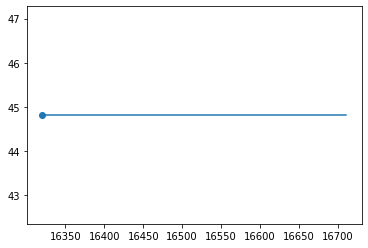

In [134]:
dates1 = np.arange(start_date1,end_date1)
dates2 = np.arange(start_date2,end_date2)
plt.figure()
# plt.plot_date(dates1, latitude1,'-')
plt.plot([start_date1, end_date1],[latitude1,latitude1])

In [13]:
start_dates

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [87]:
# start_dates = np.zeros(len(inventory[0])) # Make a list to contain all the start dates 
# end_dates = np.zeros(len(inventory[0])) # Make a list to contain all the end dates 
start_dates = [] # Make a list to contain all the start dates 
end_dates = [] # Make a list to contain all the end dates 
latitudes = np.zeros(len(inventory[0])) # Make a list to contain all the latitudes

for i in range(len(inventory[0])): 
    start_dates.append(inventory[0][i].start_date.datetime)
    end_dates.append(inventory[0][i].end_date.datetime)
    latitudes[i] = inventory[0][i].latitude
    
# start_dates =start_dates.tolist() # Make a list to contain all the start dates 
# end_dates = end_dates.tolist() # Make a list to contain all the end dates 

# Find the latitudes less than 42 degrees. 
a = latitudes
index_lat_less_than_42 = np.asarray(np.where(42 >= a))
print(type(index_lat_less_than_42))

latitudes = latitudes.tolist()

# Convert inventory to a np.array
inventory_codes = []
for i in range(len(inventory[0])):
    inventory_codes.append(inventory[0][i].code)

# inventory_codes = np.asarray(inventory_codes)
# print(type(arr_inventory_codes))

# for i in range(len(inventory[0])): 
#     start_dates.append(inventory[0][i].start_date.datetime) 
#     end_dates.append(inventory[0][i].end_date.datetime) 
#     latitudes.append(inventory[0][i].latitude) 



<class 'numpy.ndarray'>


In [88]:
# Check if the elements in start_dates correspend to the elements in invectory_codes
# They actually correspond to each other
for i in range(len(start_dates)):
    print(start_dates[i], inventory_codes[i])

2014-09-07 00:00:00 FC03D
2013-08-31 00:00:00 FN02C
2012-08-28 00:00:00 FS09B
2014-07-16 00:00:00 FS09D
2012-09-12 00:00:00 FS13B
2014-07-16 00:00:00 FS13D
2014-09-14 00:00:00 FS14D
2012-09-12 00:00:00 FS16B
2014-07-16 00:00:00 FS16D
2012-09-15 00:00:00 FS17B
2014-09-14 00:00:00 FS17D
2012-09-12 00:00:00 FS20B
2014-07-16 00:00:00 FS41D
2014-09-14 00:00:00 FS43D
2014-08-12 00:00:00 FS44D
2014-09-13 00:00:00 FS45D
2014-07-16 00:00:00 G09D
2012-09-03 00:00:00 G10B
2014-08-11 00:00:00 G10D
2012-09-17 00:00:00 G17B
2014-09-13 00:00:00 G18D
2012-08-28 00:00:00 G19B
2012-09-18 00:00:00 G25B
2012-09-17 00:00:00 G26B
2012-09-03 00:00:00 G27B
2014-08-12 00:00:00 G33D
2012-09-02 00:00:00 J09B
2014-09-10 00:00:00 J09D
2014-09-09 00:00:00 J17D
2011-10-21 00:00:00 J25A
2012-07-15 00:00:00 J25B
2013-08-22 00:00:00 J25C
2013-09-06 00:00:00 J26C
2011-10-16 00:00:00 J33A
2012-07-14 00:00:00 J33B
2013-08-22 00:00:00 J33C
2013-09-06 00:00:00 J34C
2011-07-25 00:00:00 J41A
2013-08-30 00:00:00 J41C
2013-09-0

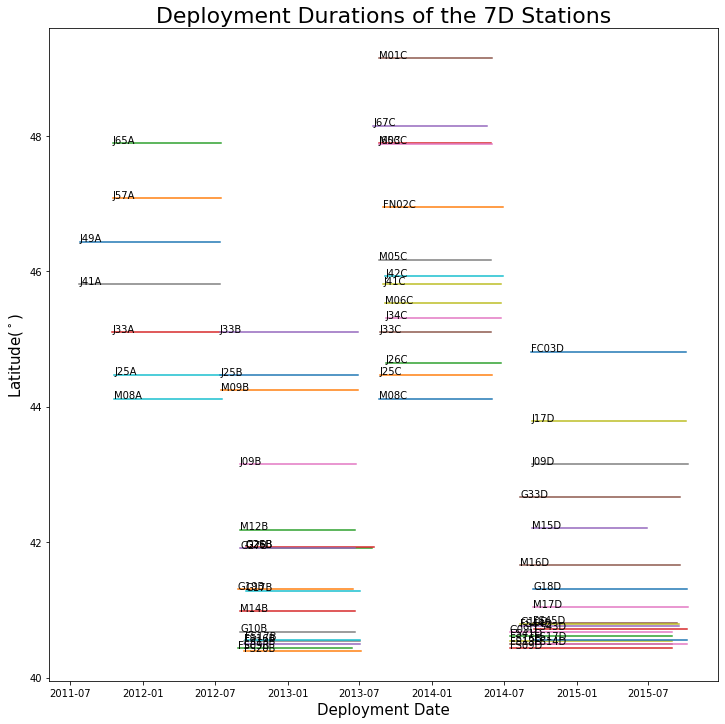

In [104]:
# Plot the start and end dates with respect to the latitudes
plt.figure(figsize=(12,12))
for i in range(len(inventory[0])):
    if latitudes[i]< 60: 
        
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=inventory_codes[i])
        plt.text(x=start_dates[i],y=latitudes[i], s = inventory_codes[i])
    

plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

# # print(range(len(inventory[0])))
# plt.figure(figsize=(10,10))
# for i in index_lat_less_than_42:
#     plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=inventory_codes[i])
#     plt.text(x=start_dates[i],y=latitudes[i], s = inventory_codes[i])

# plt.xlabel("Deployment Date",fontsize=15)
# plt.ylabel("Latitude($^\circ$)", fontsize=15)
# # plt.title("Deployment Durations of the 7D Stations",fontsize=22)


# plt.ylim(41.7,42)
plt.show()

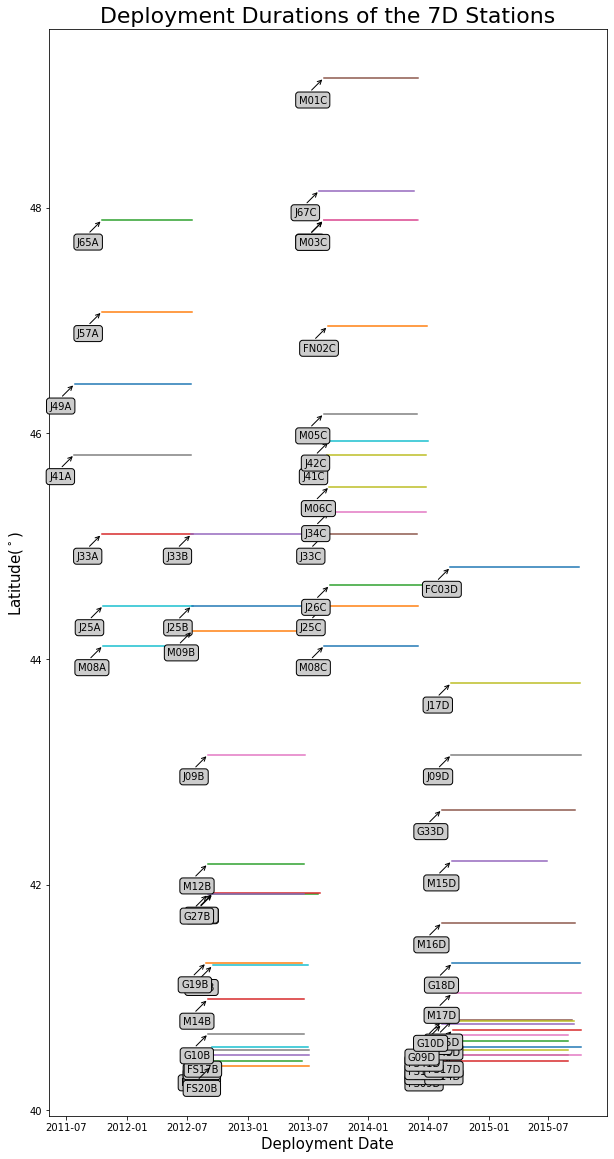

In [89]:
# Plot the start and end dates with respect to the latitudes
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=45,rad=10")

offset = 25


plt.figure(figsize=(10,20))
for i in range(len(inventory[0])):
    plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=str(inventory[0][i].code))
    plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)
plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
# plt.ylim(40,46)
# plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

plt.show()

In [90]:
from datetime import datetime
t1 = datetime(2012,7, 1)
t2 = datetime(2012,12, 31)
keep = [i for i,e in enumerate(start_dates) if (e > t1) and (e < t2)]
filtered_stations = [stations.split(",")[i] for i in keep]

In [91]:
filtered_stations

['J25A',
 'J41A',
 'J57A',
 'M09B',
 'J25B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'G19B',
 'G19B',
 'G19B',
 'M06C',
 'FN02C',
 'FN02C']

In [92]:
keep

[2, 4, 7, 9, 11, 17, 19, 21, 22, 23, 24, 26, 30, 34, 51, 52, 53]

In [113]:
filtered_stations_start_dates = [start_dates[i] for i in keep]
filtered_stations_end_dates = [end_dates[i] for i in keep]

In [114]:
# Check if the elements in start_dates correspend to the elements in invectory_codes by looking at the IRIS page
# I checkt the start and end dates for three stations each in the top, middle, and end of the list, respectively they were all right.
# They actually correspond to each other
for i in range(len(filtered_stations_start_dates)):
    print(filtered_stations_start_dates[i], filtered_stations_end_dates[i], filtered_stations[i])
    


2012-08-28 00:00:00 2013-06-12 23:59:59 FS09B
2012-09-12 00:00:00 2013-07-03 23:59:59 FS13B
2012-09-12 00:00:00 2013-07-03 23:59:59 FS16B
2012-09-15 00:00:00 2013-07-02 23:59:59 FS17B
2012-09-12 00:00:00 2013-07-04 23:59:59 FS20B
2012-09-03 00:00:00 2013-06-19 23:59:59 G10B
2012-09-17 00:00:00 2013-07-01 23:59:59 G17B
2012-08-28 00:00:00 2013-06-13 23:59:59 G19B
2012-09-18 00:00:00 2013-07-31 23:59:59 G25B
2012-09-17 00:00:00 2013-08-07 23:59:59 G26B
2012-09-03 00:00:00 2013-06-20 23:59:59 G27B
2012-09-02 00:00:00 2013-06-21 23:59:59 J09B
2012-07-15 00:00:00 2013-06-27 23:59:59 J25B
2012-07-14 00:00:00 2013-06-26 23:59:59 J33B
2012-07-17 00:00:00 2013-06-28 23:59:59 M09B
2012-09-02 00:00:00 2013-06-18 23:59:59 M12B
2012-09-02 00:00:00 2013-06-19 23:59:59 M14B


In [95]:
print(len(filtered_stations_start_dates))
print(len(filtered_stations))

17
17


In [96]:
keep_test = []
filtered_stations_test =[]

for i,e in enumerate(start_dates):
    if (e > t1) and (e < t2):
        keep_test = i

for i in keep:
    filtered_stations_test.append(stations.split(",")[i])

In [97]:
keep

[2, 4, 7, 9, 11, 17, 19, 21, 22, 23, 24, 26, 30, 34, 51, 52, 53]

In [98]:
filtered_stations

['J25A',
 'J41A',
 'J57A',
 'M09B',
 'J25B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'G19B',
 'G19B',
 'G19B',
 'M06C',
 'FN02C',
 'FN02C']

In [99]:
stations

'J25A,M08A,J25A,J33A,J41A,J49A,J65A,J57A,J65A,M09B,J25B,J25B,J33B,FS13B,FS20B,G10B,FS16B,G10B,G10B,FS09B,FS13B,FS13B,FS13B,FS16B,G10B,FS17B,G19B,M14B,M14B,G19B,G19B,M14B,G17B,G17B,G19B,G26B,G27B,G25B,G26B,M12B,M12B,G25B,M12B,M12B,J09B,J33B,J25C,M08C,J33C,J25C,M05C,M06C,FN02C,FN02C,J26C,J34C,J26C,J34C,M06C,J34C,M06C,M05C,M06C,J42C,M06C,J41C,M05C,J42C,J65C,M03C,J67C,M01C,FS16D,FS09D,FS17D,FS14D,FS44D,FS43D,FS17D,FS41D,FS13D,G09D,FS45D,G10D,M17D,M16D,G18D,M15D,M15D,G33D,G33D,J09D,J17D,FC03D'

In [102]:
# Corrected way to find the filtered stations
from datetime import datetime
t1 = datetime(2012,7, 1)
t2 = datetime(2012,12, 31)
keep = [i for i,e in enumerate(start_dates) if (e > t1) and (e < t2)]
filtered_stations = [inventory_codes[i] for i in keep]

In [103]:
for i in range(len(filtered_stations_start_dates)):
    print(filtered_stations_start_dates[i], filtered_stations[i])

2012-08-28 00:00:00 FS09B
2012-09-12 00:00:00 FS13B
2012-09-12 00:00:00 FS16B
2012-09-15 00:00:00 FS17B
2012-09-12 00:00:00 FS20B
2012-09-03 00:00:00 G10B
2012-09-17 00:00:00 G17B
2012-08-28 00:00:00 G19B
2012-09-18 00:00:00 G25B
2012-09-17 00:00:00 G26B
2012-09-03 00:00:00 G27B
2012-09-02 00:00:00 J09B
2012-07-15 00:00:00 J25B
2012-07-14 00:00:00 J33B
2012-07-17 00:00:00 M09B
2012-09-02 00:00:00 M12B
2012-09-02 00:00:00 M14B


In [111]:
filtered_stations

['FS09B',
 'FS13B',
 'FS16B',
 'FS17B',
 'FS20B',
 'G10B',
 'G17B',
 'G19B',
 'G25B',
 'G26B',
 'G27B',
 'J09B',
 'J25B',
 'J33B',
 'M09B',
 'M12B',
 'M14B']

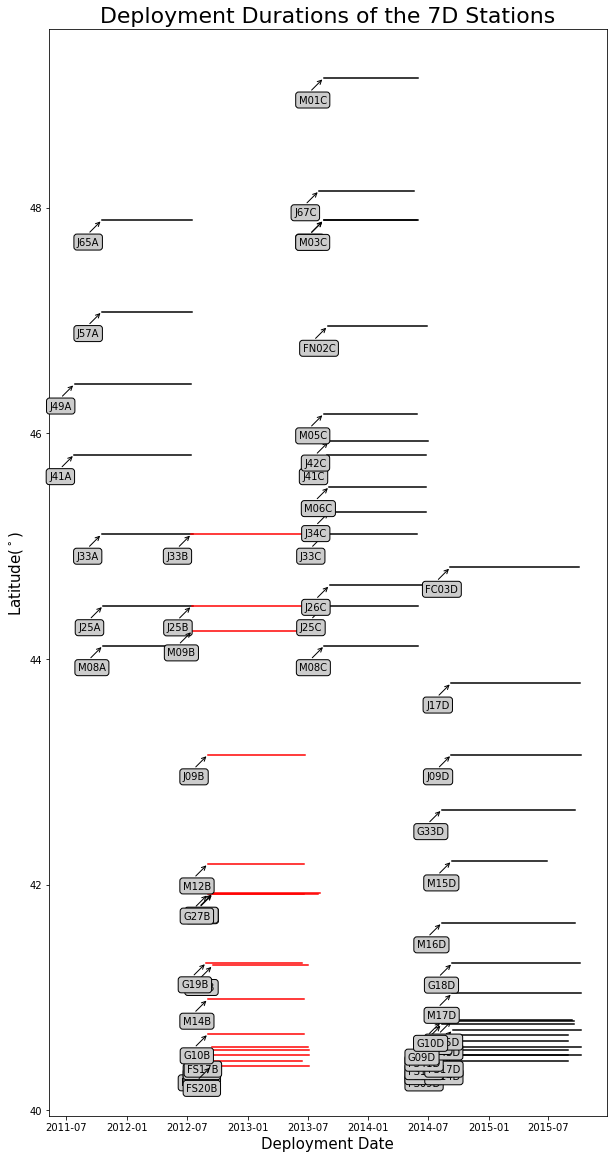

In [108]:
#  Plot the stations one more time to see if the previous code was right
# Plot the start and end dates with respect to the latitudes
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=45,rad=10")

offset = 25


plt.figure(figsize=(10,20))
for i in range(len(inventory_codes)):
    if (start_dates[i] > t1) and (start_dates[i] < t2):
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='r', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
    else:
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='black', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
# plt.ylim(40,46)
# plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

plt.show()

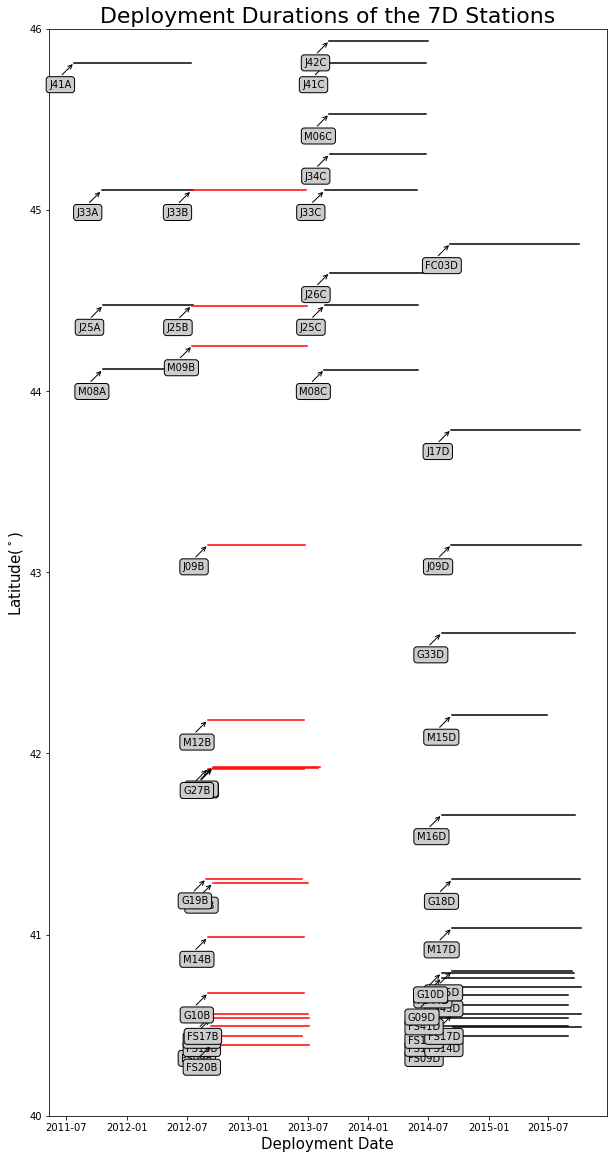

In [110]:
#  Plot the stations one more time to see if the previous code was right
# Zoom into latitudes 40 through 46 degrees.
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=45,rad=10")

offset = 25


plt.figure(figsize=(10,20))
for i in range(len(inventory_codes)):
    if (start_dates[i] > t1) and (start_dates[i] < t2):
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='r', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
    else:
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], color='black', label=str(inventory[0][i].code))
        plt.annotate(text=str(inventory[0][i].code), xy=(start_dates[i],latitudes[i]), xytext=(-1*offset,-1*offset),textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)
        
plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
plt.ylim(40,46)
# plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

plt.show()

In [40]:
from pnwstore.mseed import WaveformClient

client = WaveformClient()

for sta in filtered_stations:
    for day in range(30):
        print(client.get_waveforms(network="7D", station=sta, channel="?H?",
                               year=2013, month=5, day=day+1))

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) 

In [43]:

s= client.get_waveforms(network="7D", station='M09B', channel="?H?",
                               year=2013, month=5, day=26)


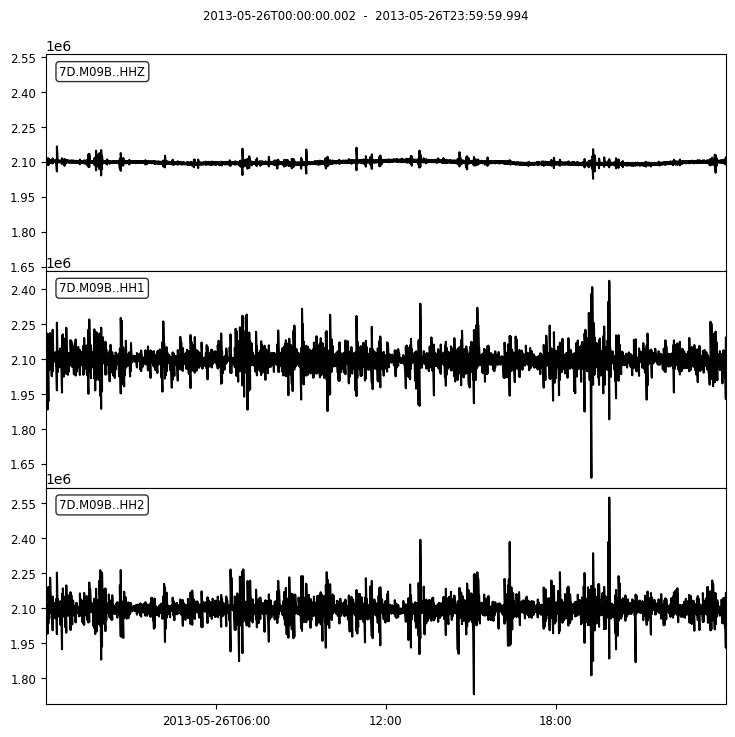

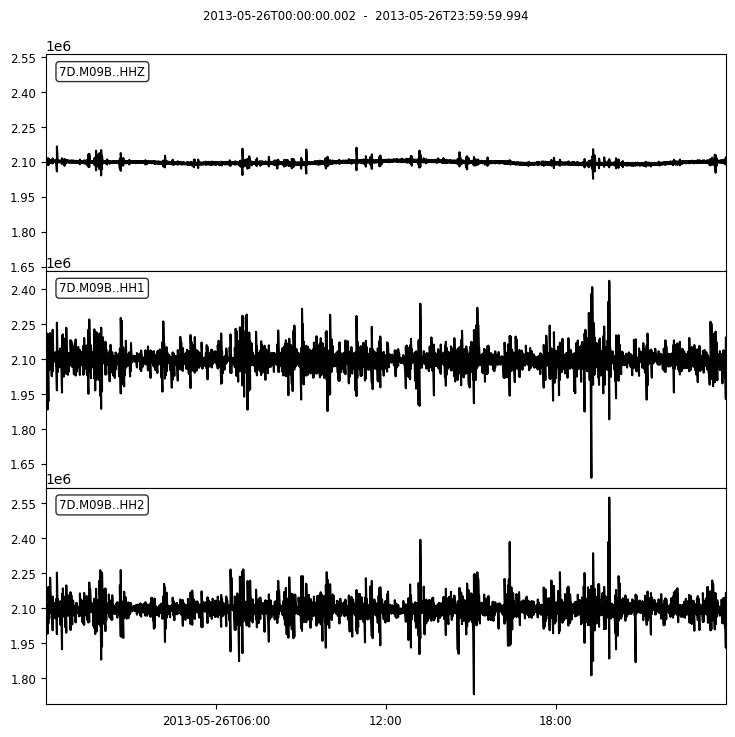

In [45]:
s.plot()

# Step 1: Load Seisbench phasepicker 

In [65]:
from seisbench.models import EQTransformer
model = EQTransformer.from_pretrained("original")
model

EQTransformer(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): Conv1d(3, 8, kernel_size=(11,), stride=(1,), padding=(5,))
      (1): Conv1d(8, 16, kernel_size=(9,), stride=(1,), padding=(4,))
      (2): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
      (3): Conv1d(16, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (4): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (pools): ModuleList(
      (0-6): 7 x MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (res_cnn_stack): ResCNNStack(
    (members): ModuleList(
      (0-3): 4 x ResCNNBlock(
        (dropout): SpatialDropout1d(
          (dropout): Dropout2d(p=0.1, inplace=False)
        )
        (norm1): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(

#  Step 2: data reading and filterting


In [47]:
s= client.get_waveforms(network="7D", station='M09B', channel="?H?",
                               year=2013, month=5, day=26)
s

3 Trace(s) in Stream:
7D.M09B..HH1 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples

In [53]:
# This is to filter data 
s.filter('bandpass', freqmin=4, freqmax=15)

3 Trace(s) in Stream:
7D.M09B..HH1 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples

# Step 3: Pick phase

In [59]:
# Use the GPU
model.to(device)

EQTransformer(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): Conv1d(3, 8, kernel_size=(11,), stride=(1,), padding=(5,))
      (1): Conv1d(8, 16, kernel_size=(9,), stride=(1,), padding=(4,))
      (2): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
      (3): Conv1d(16, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (4): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (pools): ModuleList(
      (0-6): 7 x MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (res_cnn_stack): ResCNNStack(
    (members): ModuleList(
      (0-3): 4 x ResCNNBlock(
        (dropout): SpatialDropout1d(
          (dropout): Dropout2d(p=0.1, inplace=False)
        )
        (norm1): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(

In [60]:
model.classify(s)

([<seisbench.util.annotations.Pick at 0x7f07b26a4f70>,
  <seisbench.util.annotations.Detection at 0x7f079f751be0>])

In [61]:
picks = model.classify(s)

# Plot the Picks

In [63]:
type(picks)

tuple

In [75]:
from EQTransformer.utils.plot import plot_data_chart


SyntaxError: invalid syntax (3411383673.py, line 1)